#  Analiza Danych w Pythonie: `pandas`

### 10 grudnia 2022

### `pandas`
Biblioteka `pandas` jest podstawowym narzędziem w ekosystemie Pythona do analizy danych:
 * dostarcza dwa podstawowe typy danych: 
   * `Series` (szereg, 1D)
   * `DataFrame` (ramka danych, 2D)
 * operacje na tych obiektach: obsługa brakujących wartości, łączenie danych;
 * obsługuje dane różnego typu, np. szeregi czasowe;
 * biblioteka bazuje na `numpy` -- bibliotece do obliczeń numerycznych;
 * pozwala też na prostą wizualizację danych;
 * ETL: extract, transform, load.

Żeby zaimportowąc bibliotekę `pandas` wystarczy:

In [2]:
import pandas as pd

#### __Zadanie 0__: sprawdź, czy masz zainstalowaną bibliotekę `pandas`.

### [Szeregi](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) (`pd.Series`)

 Szereg reprezentuje jednorodne dane jednowymiarowe - jest odpowiednikiem wektora w R.
  * Szeregi możemy tworzyć na różne sposoby (więcej za chwilę), np. z obiektów tj. listy i słowniki.
  * Dane muszą być jednorodne. W przeciwnym przypadku nastąpi automatyczna konwersja.
  * Podczas tworzenia szeregu musimy podać jeden obowiązkowy argument `data` - dane.
  * Ponadto możemy podać też indeks (`index`), typ danych (`dtype`) lub nazwę (`name`).
  
  
  ```
  class pandas.Series(data=None, index=None, dtype=None, name=None)
  ```

Podczas tworzenie szeregu mozemy podać dane w formacie listy lub słownika.

Poniżej jest przykład przedstawiający tworzenie szeregu z danych, które są zawarte w liście:

In [13]:

data = [211819, 682758, 737011, 779511, 673790, 673790, 444177, 136791]

s = pd.Series(data)

s

0    211819
1    682758
2    737011
3    779511
4    673790
5    673790
6    444177
7    136791
dtype: int64

W przypadku, gdy dane pochodzą z listy i nie podaliśmy indeksu, pandas doda automatyczny indeks liczbowy zaczynający się od 0.

W przypadku przekazania słownika jako danych do szeregu, pandas wykorzysta klucze do stworzenia indeksu:

In [16]:
members = {'April': 211819,'May': 682758, 'June': 737011, 'July': 779511}

s = pd.Series(members)

s

April    211819
May      682758
June     737011
July     779511
dtype: int64

Podczas tworzenia szeregu możemy zdefiniować indeks, jak i nazwę szeregu:

In [18]:
months = ['April', 'May', 'June', 'July']

data = [211819, 682758, 737011, 779511]

s = pd.Series(data=data, index=months, dtype=float, name='Rides')

s

April    211819.0
May      682758.0
June     737011.0
July     779511.0
Name: Rides, dtype: float64

Odwołanie się do poszczególnego elementu odbywa się przy pomocy klucza z indeksu.

In [22]:
members = {'April': 211819,'May': 682758, 'June': 737011, 'July': 779511}

s = pd.Series(members)

print(s['April'])

s['August'] = 673790
s

211819


April     211819
May       682758
June      737011
July      779511
August    673790
dtype: int64

Dodanie elementu do szeregu odbywa się poprzez definiowanie nowego klucza:

In [23]:
members = {'April': 211819,'May': 682758, 'June': 737011, 'July': 779511}

s = pd.Series(members)

s['August'] = 673790

s

April     211819
May       682758
June      737011
July      779511
August    673790
dtype: int64

Więcej nt. indeksowania w szeregach w dalszej części kursu.

Podstawowa cechą szeregu jest wykonywanie operacji w sposób wektorowy. Działa to w następujący sposób:
 * gdy w obu szeregach jest zawarty ten sam klucz, to są sumowane ich wartości;
 * w przeciwnym przypadku wartość klucza w wynikowym szeregu to `pd.NaN`.  
 * Równoważnie możemy wykorzystać metodę `pandas.Series.add`. W tym przypadku możemy podać domyślną wartość w przypadku braku klucza.

In [24]:
members = pd.Series({'May': 682758, 'June': 737011,  'August': 673790, 'July': 779511,
'September': 673790, 'October': 444177})

occasionals = pd.Series({'May': 147898, 'June': 171494, 'July': 194316, 'August': 206809,
'September': 140492})

all_data = members + occasionals
# Równoważnie
all_data = members.add(occasionals)
all_data

August       880599.0
July         973827.0
June         908505.0
May          830656.0
October           NaN
September    814282.0
dtype: float64

Możemy wykonać operacje arytmetyczne na szeregu: 

In [17]:
members = pd.Series({'May': 682758, 'June': 737011, 'July': 779511, 'August': 673790,
'September': 673790, 'October': 444177})

members += 1000

members

May          683758
June         738011
July         780511
August       674790
September    674790
October      445177
dtype: int64

### Podsumowanie
 * Szeregi działają podobnie do słowników, z tą różnicą, że wartości muszą być jednorodne (tego samego typu).
 * Odwołanie do poszczególnych elementów odbywa się poprzez nawiasy `[]` i podanie klucza.
 * W przeciwieństwie do słowników, możemy w prosty sposób wykonywać operacje arytmetyczne.

### Zadanie 1
 * Stwórz szereg `n`, który będzie zawierać liczby od 0 do 10 (włącznie).
 * Stwórz szereg `n2`, który będzie zawierać kwadraty liczb od 0 do 10 (włącznie).
 * Następnie stwórz szereg `trojkatne`, który będzie sumą powyższych szeregów podzieloną przez 2.

### [Ramka danych](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) (`pd.DataFrame`)

Ramka danych jest podstawową strukturą danych w bibliotece `pandas`, która pozwala na trzymanie i reprezentowanie danych tabelarycznych (dwuwymiarowych).
 * Posiada kolumny (cechy) i wiersze (obserwacje, przykłady).
 * Możemy też patrzeć na nią jak na słownik, którego wartościami są szeregi.

```
class pandas.DataFrame(data=None, index=None, columns=None, dtype=None)
```
 

Ramkę danych możemy stworzyć na różne sposoby.

Pierwszy z nich ("kolumnowy") polega na zdefiniowaniu ramki poprzez podanie szeregów jako kolumn:

In [24]:
members = pd.Series({'May': 682758, 'June': 737011, 'July': 779511})
occasionals = pd.Series({'May': 147898, 'June': 171494, 'July': 194316})

df = pd.DataFrame({'members': members, 'occasionals': occasionals})
df

,members,occasionals
May,682758,147898
June,737011,171494
July,779511,194316
August,673790,206809
September,673790,140492
October,444177,53596


Drugim popularnym sposobem jest przekazanie listy słowników. Wtedy `pandas` zinterpretuje to jako listę przykładów:

In [36]:
data = [
    {'members': 682758, 'occasionals': 147898},
    {'occasionals': 171494,'members': 737011},
    {'members': 779511, 'occasionals': 194316},
]

df = pd.DataFrame(data)

df

,members,occasionals
0,682758,147898
1,737011,171494
2,779511,194316


Możemy też wykorzystać metodę `from_dict` ([doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html)), która pozwala zdefiniować czy podane dane są w podane w postaci kolumnowej lub wierszowej:

In [39]:
data = {
    'May': {'members': 682758, 'occasionals': 147898},
    'June': {'members': 737011, 'occasionals': 171494},
    'July': {'members': 779511, 'occasionals': 194316}
}

df = pd.DataFrame.from_dict(data, orient='index')
print('index\n', df)
print()
df = pd.DataFrame.from_dict(data, orient='columns')
print('columns\n', df)


index
       members  occasionals
May    682758       147898
June   737011       171494
July   779511       194316

columns
                 May    June    July
members      682758  737011  779511
occasionals  147898  171494  194316


### Wczytywanie danych

Biblioteka `pandas` pozwala na wczytanie i zapis danych z różnych formatów:
 * formaty tekstowe, np. `csv`, `json`
 * pliki arkuszy kalkulacyjnych: Excel (xls, xlsx)
 * bazy danych
 * inne: `sas` `spss`


Efektem wczytania danych jest odpowiednio stworzona ramka danych (`DataFrame`).

Jednym z najprostszych formatów danych jest format `csv`, gdzie kolejne wartości są rozdzielone przecinkiem.

Żeby wczytać dane w takim formacie należy użyć funkcji `pandas.read_csv`.

Pandas pozwala na ustawienie wielu parametrów (np. separator, cudzysłowy). Więcej na ten temat w [dokumentacji](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [42]:
df = pd.read_csv('gapminder.csv')

df

,Country,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility
0,Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20
1,Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76
2,Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73
3,Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43
4,Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16
...,...,...,...,...,...,...,...,...
170,Venezuela,28.13408,27.44500,17911.0,28116716.0,17.1,74.2,2.53
171,Vietnam,21.06500,20.91630,4085.0,86589342.0,26.2,74.1,1.86
172,Palestine,29.02643,26.57750,3564.0,3854667.0,24.7,74.1,4.38
173,Zambia,23.05436,20.68321,3039.0,13114579.0,94.9,51.1,5.88


In [47]:
df = pd.read_csv('./titanic_train.tsv', delimiter='\t', index_col=0, nrows=5)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Braund\t Mr. Owen Harris,male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,Heikkinen\t Miss. Laina,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35,1,0,113803,53.1000,C123,S
5,0,3,Allen\t Mr. William Henry,male,35,0,0,373450,8.0500,NaN,S


Do wczytania danych z arkusza kalkulacyjnego służy funkcja `pandas.read_excel`. Do otworzenia pliku `xlsx` może być koniecnze ustawienie parametru: `engine='openpyxl`. Więcej opcji w [dokumentacji](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html).

In [50]:
df = pd.read_excel('./bikes.xlsx', engine='openpyxl', nrows=5)
df

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member
0,2019-04-14 07:55:22,6001,2019-04-14 08:07:16,6132,713,1
1,2019-04-14 07:59:31,6411,2019-04-14 08:09:18,6411,587,1
2,2019-04-14 07:59:55,6097,2019-04-14 08:12:11,6036,736,1
3,2019-04-14 07:59:57,6310,2019-04-14 08:27:58,6345,1680,1
4,2019-04-14 08:00:37,7029,2019-04-14 08:14:12,6250,814,0


Innym ważnym źródłem informacji są bazy danych. Pandas potrafi komunikować się z bazą danych za pomocą biblioteki [SQLAlchemy](https://pypi.org/project/SQLAlchemy/) i dostarcza odpowiedną funkcję:
 * `pandas.read_sql` - wczytanie całej tabeli lub zapytania do bazy danych

In [63]:
df = pd.read_sql('Album', con='sqlite:///Chinook.sqlite', index_col='AlbumId')

df

,Title,ArtistId
AlbumId,,
1,For Those About To Rock We Salute You,1
2,Balls to the Wall,2
3,Restless and Wild,2
4,Let There Be Rock,1
5,Big Ones,3
...,...,...
343,Respighi:Pines of Rome,226
344,Schubert: The Late String Quartets & String Qu...,272
345,Monteverdi: L'Orfeo,273


In [65]:
import sqlalchemy

engine = sqlalchemy.create_engine('sqlite:///Chinook.sqlite', echo=True)
connection  = engine.raw_connection()

df = pd.read_sql('SELECT * FROM Album', con='sqlite:///Chinook.sqlite', index_col='AlbumId')
df

,Title,ArtistId
AlbumId,,
1,For Those About To Rock We Salute You,1
2,Balls to the Wall,2
3,Restless and Wild,2
4,Let There Be Rock,1
5,Big Ones,3
...,...,...
343,Respighi:Pines of Rome,226
344,Schubert: The Late String Quartets & String Qu...,272
345,Monteverdi: L'Orfeo,273


Biblioteka `pandas` potrafi także automatycznie pobrać dane, które znajdują się w Internecie. Dzięki temu możemy zaciągnąć dane z Google spreadsheets:

In [70]:
url = "https://docs.google.com/spreadsheets/d/1ycvVWmVJ2MTn3_1NRVmVrySoHEHdWlwi4-Kr1W0Nv28/export?format=csv&gid=848662053"
df = pd.read_csv(url)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30,136,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6


#### Podsumowanie


 * Biblioteka `pandas` wspiera pobieranie danych z różnych formatów i źródeł.
 * Każda funkcja ma listę argumentów, które pozwalają na ustawić poszczególne  parametry (np. [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv)).

### Zapis i eksport danych

In [ ]:
Pandas pozwala w prosty sposób na zapisywanie ramki danych do pliku. 

In [72]:
members = pd.Series({'May': 682758, 'June': 737011, 'July': 779511})
occasionals = pd.Series({'May': 147898, 'June': 171494, 'July': 194316})

df = pd.DataFrame({'members': members, 'occasionals': occasionals})


In [73]:
# zapis do formatu CSV
df.to_csv('tmp.csv')
# zapis do arkusza kalkulacyjnego 
df.to_excel('tmp.xlsx')

Ponadto możemy przekonwertować ramkę danych do JSONa lub Pythonowego słownika:

In [74]:
print(df.to_json())

{"members":{"May":682758,"June":737011,"July":779511},"occasionals":{"May":147898,"June":171494,"July":194316}}


In [76]:
print(df.to_dict())


{'members': {'May': 682758, 'June': 737011, 'July': 779511}, 'occasionals': {'May': 147898, 'June': 171494, 'July': 194316}}


Lub przekopiować dane do schowka:

In [77]:
df.to_clipboard()

### Zadanie



 

 * Przekonwertuj tabele `Customer` z bazy `Chinook.sqlite` do arkusza kalkulacyjnego. Plik wynikowy nazwij `customers.xlsx`.
 * Tabela `Employee` zawiera informacje o pracownikach firmy Chinook. Wyswietl dane na ekranie i podaj miasta, w których mieszkają pracownicy.
 * Tabela `Invoice` zawiera informacje o fakturach. Przekonwertuj kolumnę `BillingCountry` do pythonowego słownika, a następnie podaj najcześciej występującą wartość. Ile razy pojawiła się?


### Ramka danych - podstawy

#### Kolumny

Na ramkę danych możemy patrzeć jak na swego rodzaju słownik, którego wartościami są szeregi. Pozwoli to na uzyskanie lepszej intuicji.



In [90]:
df = pd.read_csv('./gapminder.csv', index_col='Country', nrows=8, usecols=['Country', 'gdp', 'population','life_expectancy'])

df

,gdp,population,life_expectancy
Country,,,
Afghanistan,1311.0,26528741.0,52.8
Albania,8644.0,2968026.0,76.8
Algeria,12314.0,34811059.0,75.5
Angola,7103.0,19842251.0,56.7
Antigua and Barbuda,25736.0,85350.0,75.5
Argentina,14646.0,40381860.0,75.4
Armenia,7383.0,2975029.0,72.3
Australia,41312.0,21370348.0,81.6


Dostęp do poszczególnej kolumny możemy uzystać na dwa sposoby:

In [83]:
# notacja z kropką
df.population

Country
Afghanistan            26528741.0
Albania                 2968026.0
Algeria                34811059.0
Angola                 19842251.0
Antigua and Barbuda       85350.0
Argentina              40381860.0
Armenia                 2975029.0
Australia              21370348.0
Name: population, dtype: float64

In [84]:
# Operator []
df['population']

Country
Afghanistan            26528741.0
Albania                 2968026.0
Algeria                34811059.0
Angola                 19842251.0
Antigua and Barbuda       85350.0
Argentina              40381860.0
Armenia                 2975029.0
Australia              21370348.0
Name: population, dtype: float64

Do operatora `[]` możemy też podać listę nazw kolumn:

In [82]:
df[['gdp','population']]

,gdp,population
Country,,
Afghanistan,1311.0,26528741.0
Albania,8644.0,2968026.0
Algeria,12314.0,34811059.0
Angola,7103.0,19842251.0
Antigua and Barbuda,25736.0,85350.0
Argentina,14646.0,40381860.0
Armenia,7383.0,2975029.0
Australia,41312.0,21370348.0


Listę kolumn możemy pobrać za pomocą:

In [85]:
df.columns

Index(['female_BMI', 'male_BMI', 'gdp', 'population', 'under5mortality',
       'life_expectancy', 'fertility'],
      dtype='object')

In [93]:
df.columns = ['PKB', 'Populacja', 'ODŻ']

df

,PKB,Populacja,ODŻ
Country,,,
Afghanistan,1311.0,26528741.0,52.8
Albania,8644.0,2968026.0,76.8
Algeria,12314.0,34811059.0,75.5
Angola,7103.0,19842251.0,56.7
Antigua and Barbuda,25736.0,85350.0,75.5
Argentina,14646.0,40381860.0,75.4
Armenia,7383.0,2975029.0,72.3
Australia,41312.0,21370348.0,81.6


Żeby odwołać się do poszczególnych wierszy należy wykorzystać metodę `loc`:

In [95]:
df.loc['Argentina']

PKB             14646.0
Populacja    40381860.0
ODŻ                75.4
Name: Argentina, dtype: float64

Metoda `loc` również może przyjąć listę wierszy: 

In [96]:
df.loc[['Albania', 'Angola']]

,PKB,Populacja,ODŻ
Country,,,
Albania,8644.0,2968026.0,76.8
Angola,7103.0,19842251.0,56.7


Możemy również podać drugi parametr: nazwy kolumn:

In [99]:
df2 = df.loc[['Albania', 'Angola'], ['PKB', 'Populacja']]

df2

,PKB,Populacja
Country,,
Albania,8644.0,2968026.0
Angola,7103.0,19842251.0


Albo wykorzystać tzw. _slicing_, cyzli operator `:`:

In [97]:
df.loc['Albania': 'Angola', 'PKB': 'ODŻ']

,PKB,Populacja,ODŻ
Country,,,
Albania,8644.0,2968026.0,76.8
Algeria,12314.0,34811059.0,75.5
Angola,7103.0,19842251.0,56.7


Żeby odwołać się do pojedyńczej wartości możemy użyć metody `at`:

In [100]:
df.at['Angola', 'PKB']

7103.0

Dostęp do indeksu:

In [101]:
df.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia'],
      dtype='object', name='Country')

#### Podstawowe metody `pd.Series` i `pd.DataFrame`

In [53]:
members = pd.Series({'May': 682758, 'June': 737011, 'July': 779511, 'August': 673790,
'September': 673790, 'October': 444177})

occasionals = pd.Series({'May': 147898, 'June': 171494, 'July': 194316, 'August': 206809,
'September': 140492, 'October': 53596})

df = pd.DataFrame({'members': members, 'occasionals': occasionals})

df

,members,occasionals
May,682758,147898
June,737011,171494
July,779511,194316
August,673790,206809
September,673790,140492
October,444177,53596


Metoda `head` pozwala tworzy nową ramkę danych z pierwszymi 5 przykładami:

In [56]:
df.head()

,members,occasionals
May,682758,147898


Metoda `tail` robi to samo, ale z 5 ostatnymi przykładami:

In [57]:
df.tail()

,members,occasionals
June,737011,171494
July,779511,194316
August,673790,206809
September,673790,140492
October,444177,53596


Metoda `sample` pozwala na stworzenie nowej ramki danych z wylosowanymi `n` przykładami:

In [60]:
df.sample(3)

,members,occasionals
May,682758,147898
August,673790,206809
September,673790,140492


Metoda `describe` zwraca podstawowe statystyki m.in.: liczebność, średnią, wartości skrajne: 

In [101]:
df.describe()

,members,occasionals
count,6.000000,6.000000
mean,665172.833333,152434.166667
std,116216.045456,54783.506738
min,444177.000000,53596.000000
25%,673790.000000,142343.500000
50%,678274.000000,159696.000000
75%,723447.750000,188610.500000
max,779511.000000,206809.000000


Metoda `info` zwraca informacje techniczne o kolumnach: np. typ danych:

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, May to October
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   members      6 non-null      int64
 1   occasionals  6 non-null      int64
dtypes: int64(2)
memory usage: 144.0+ bytes


Podstawową informacją o ramce danych to liczba przykładów w ramce danych. Możemy wykorzystać to tego funkcję `len`:

In [68]:
len(df)

6

Natomiast atrybut `shape` zwraca nam krotkę z liczbą przykładów i liczbą kolumn:

In [69]:
df.shape

(6, 2)

#### Operacja arytmetyczne

 * `max`, `idxmax`
 * `min`, `idxmin`
 * `mean`
 * `count`

In [167]:
df.mean()

C:\Users\Tomasz\AppData\Local\Temp\ipykernel_49236\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Survived     0.383838
Pclass       2.308642
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64

Zbiór wartości i zliczanie wartości:

In [148]:
dane = pd.Series([1, 3, 2, 3, 1, 1, 2, 3, 2, 3])

print(dane.unique())

dane = pd.Series([1, 3, 2, 3, 1, 1, 2, 3, 2, 3])

print(dane.value_counts())

[1 3 2]
3    4
1    3
2    3
dtype: int64


Sprawdzanie czy brakuje danych:

In [164]:
df = pd.read_csv('./titanic_train.tsv', sep='\t', index_col='PassengerId')
df.Age.isnull()


PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889     True
890    False
891    False
Name: Age, Length: 891, dtype: bool

### Dodawanie i modyfikowanie danych

In [101]:
df = pd.read_csv('./gapminder.csv', index_col='Country', nrows=5)

df

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility
Country,,,,,,,
Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20
Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76
Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73
Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43
Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16


In [108]:
conts = pd.Series({
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria':' Africa', 'Angola': 'Africa', 'Antigua and Barbuda': 'Americas'})

df['continent'] = conts

df['tmp'] = 1

df

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility,continent,tmp
Country,,,,,,,,,
Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20,Asia,1
Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76,Europe,1
Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73,Africa,1
Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43,Africa,1
Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16,Americas,1


In [109]:
df.loc['Argentina'] = {
    'female_BMI': 27.46523,
    'male_BMI': 27.5017,
    'gdp': 14646.0,
    'population': 40381860.0,
    'under5mortality': 15.4,
    'life_expectancy': 75.4,
    'fertility': 2.24
}
df

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility,continent,tmp
Country,,,,,,,,,
Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20,Asia,1.0
Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76,Europe,1.0
Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73,Africa,1.0
Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43,Africa,1.0
Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16,Americas,1.0
Argentina,27.46523,27.50170,14646.0,40381860.0,15.4,75.4,2.24,NaN,NaN


In [122]:
df.drop('gdp', axis='columns')


,female_BMI,male_BMI,population,under5mortality,life_expectancy,fertility,continent,tmp
Country,,,,,,,,
Afghanistan,21.07402,20.62058,26528741.0,110.4,52.8,6.20,Asia,1.0
Algeria,26.36841,24.59620,34811059.0,29.5,75.5,2.73,Africa,1.0
Antigua and Barbuda,27.50545,25.76602,85350.0,10.9,75.5,2.16,Americas,1.0
Argentina,27.46523,27.50170,40381860.0,15.4,75.4,2.24,NaN,NaN


### Filtrowanie danych

Biblioteka pandas posiada 2 sposoby na filtrowanie danych zawartych w ramce danych:
 * operator `[]` -- najbardziej rozpowszechniony;
 * metoda `query()`.
Oba sposoby mają różną składnię.
 

In [104]:
df = pd.read_csv('./titanic_train.tsv', sep='\t', index_col='PassengerId')

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Braund\t Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Heikkinen\t Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
5,0,3,Allen\t Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
df['Survived']

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [108]:
df['Survived'] == 1

PassengerId
1      False
2       True
3       True
4       True
5      False
       ...  
887    False
888     True
889    False
890     True
891    False
Name: Survived, Length: 891, dtype: bool

In [109]:
df[df['Pclass'] == 1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
7,0,1,McCarthy\t Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S
12,1,1,Bonnell\t Miss. Elizabeth,female,58.0,0,0,113783,26.5500,C103,S
24,1,1,Sloper\t Mr. William Thompson,male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,Beckwith\t Mrs. Richard Leonard (Sallie Monypeny),female,47.0,1,1,11751,52.5542,D35,S
873,0,1,Carlsson\t Mr. Frans Olof,male,33.0,0,0,695,5.0000,B51 B53 B55,S
880,1,1,Potter\t Mrs. Thomas Jr (Lily Alexenia Wilson),female,56.0,0,1,11767,83.1583,C50,C


#### Operatory

* `&` - koniukcja (i)
* `|` - alternatywa (lub)
* `~` - negacja (nie)
* `()` - jeżeli mamy kilka warunków to warto je uporządkować w nawiasy

In [110]:
pierwsza_klasa = df['Pclass'] == 1
kobiety = df['Sex'] == 'female'

df[pierwsza_klasa & kobiety]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
12,1,1,Bonnell\t Miss. Elizabeth,female,58.0,0,0,113783,26.5500,C103,S
32,1,1,Spencer\t Mrs. William Augustus (Marie Eugenie),female,NaN,1,0,PC 17569,146.5208,B78,C
53,1,1,Harper\t Mrs. Henry Sleeper (Myna Haxtun),female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,Wick\t Mrs. George Dennick (Mary Hitchcock),female,45.0,1,1,36928,164.8667,NaN,S
863,1,1,Swift\t Mrs. Frederick Joel (Margaret Welles B...,female,48.0,0,0,17466,25.9292,D17,S
872,1,1,Beckwith\t Mrs. Richard Leonard (Sallie Monypeny),female,47.0,1,1,11751,52.5542,D35,S


In [111]:

df[df['SibSp'] > df['Parch']]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Braund\t Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
8,0,3,Palsson\t Master. Gosta Leonard,male,2.0,3,1,349909,21.0750,NaN,S
10,1,2,Nasser\t Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
861,0,3,Hansen\t Mr. Claus Peter,male,41.0,2,0,350026,14.1083,NaN,S
862,0,2,Giles\t Mr. Frederick Edward,male,21.0,1,0,28134,11.5000,NaN,S
864,0,3,"Sage\t Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


#### `pd.DataFrame.query`

Innym sposobem na filtrowanie danych jest metoda `query`, która jako argument przyjmuje wyrażenie:

In [139]:
df.query('Pclass == 1').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
7,0,1,McCarthy\t Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S
12,1,1,Bonnell\t Miss. Elizabeth,female,58.0,0,0,113783,26.5500,C103,S
24,1,1,Sloper\t Mr. William Thompson,male,28.0,0,0,113788,35.5000,A6,S


In [151]:
df.query('(Pclass == 1) and (Sex == "female")').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
12,1,1,Bonnell\t Miss. Elizabeth,female,58.0,0,0,113783,26.5500,C103,S
32,1,1,Spencer\t Mrs. William Augustus (Marie Eugenie),female,NaN,1,0,PC 17569,146.5208,B78,C
53,1,1,Harper\t Mrs. Henry Sleeper (Myna Haxtun),female,49.0,1,0,PC 17572,76.7292,D33,C


In [153]:
df.query('SibSp > Parch')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Braund\t Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
8,0,3,Palsson\t Master. Gosta Leonard,male,2.0,3,1,349909,21.0750,NaN,S
10,1,2,Nasser\t Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
861,0,3,Hansen\t Mr. Claus Peter,male,41.0,2,0,350026,14.1083,NaN,S
862,0,2,Giles\t Mr. Frederick Edward,male,21.0,1,0,28134,11.5000,NaN,S
864,0,3,"Sage\t Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [113]:
young = 18
df.query('Age < @young').shape

(113, 11)

### Zadanie

#### Operacje na wierszach i kolumnach

In [135]:
df = pd.read_csv('./gapminder.csv', index_col='Country', nrows=5)

df

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility
Country,,,,,,,
Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20
Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76
Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73
Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43
Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16


Iterowanie po ramce danych oznacza oznacza przejście po nazwach kolumn:

In [144]:
for column_name in df:
    print(column_name)

female_BMI
male_BMI
gdp
population
under5mortality
life_expectancy
fertility


In [147]:
for col_name, series in df.items():
    print(col_name, series)
    break

female_BMI Country
Afghanistan            21.07402
Albania                25.65726
Algeria                26.36841
Angola                 23.48431
Antigua and Barbuda    27.50545
Name: female_BMI, dtype: float64


In [141]:
for idx, row in df.iterrows():
    print(idx, '\n', row)
    break

Afghanistan 
 female_BMI         2.107402e+01
male_BMI           2.062058e+01
gdp                1.311000e+03
population         2.652874e+07
under5mortality    1.104000e+02
life_expectancy    5.280000e+01
fertility          6.200000e+00
Name: Afghanistan, dtype: float64


In [162]:
def bmi_level(bmi):
    if bmi <= 18.5:
        level =  'underweight'
    elif bmi < 25:
        level =  'normal'
    elif bmi < 30:
        level =  'overweight'
    else:
        level = 'obese'
    return level

s = df['male_BMI'].map(bmi_level)
    
s

Country
Afghanistan                normal
Albania                overweight
Algeria                    normal
Angola                     normal
Antigua and Barbuda    overweight
Name: male_BMI, dtype: object

In [163]:
def bmi_level(row_data):
    bmi = row_data['male_BMI']
    if bmi <= 18.5:
        return 'underweight'
    elif bmi < 25:
        return 'normal'
    elif bmi < 30:
        return 'overweight'
    return  'obese'

df.apply(bmi_level, axis=1)

Country
Afghanistan                normal
Albania                overweight
Algeria                    normal
Angola                     normal
Antigua and Barbuda    overweight
dtype: object

In [220]:
df.transpose()

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda
female_BMI,2.107402e+01,2.565726e+01,2.636841e+01,2.348431e+01,27.50545
male_BMI,2.062058e+01,2.644657e+01,2.459620e+01,2.225083e+01,25.76602
gdp,1.311000e+03,8.644000e+03,1.231400e+04,7.103000e+03,25736.00000
population,2.652874e+07,2.968026e+06,3.481106e+07,1.984225e+07,85350.00000
under5mortality,1.104000e+02,1.790000e+01,2.950000e+01,1.920000e+02,10.90000
life_expectancy,5.280000e+01,7.680000e+01,7.550000e+01,5.670000e+01,75.50000
fertility,6.200000e+00,1.760000e+00,2.730000e+00,6.430000e+00,2.16000


### Grupowanie (`groupby`)

Często zdarza się, gdy potrzebujemy podzielić dane ze względu na wartości w zadanej kolumnie, a następnie obliczenie zebranie danych w każdej z grup. Do tego służy metody `groupby`.

In [6]:
df = pd.read_csv('./titanic_train.tsv', sep='\t', index_col='PassengerId')

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Braund\t Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Heikkinen\t Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
5,0,3,Allen\t Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


_Przykład_: chcemy obliczyć średnią dla każdej z kolumn z podziałem na płeć pasażera, która jest zawarta w kolumnie `Sex`. Stąd jako parametr do metody `groupby` podajemy nazwę kolumny `Sex`, a następnie wywołujemy metodę `mean`:

In [9]:
df.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


Możemy też podać listę nazw kolumn. Wtedy wartości zostaną obliczone dla każdej z wytworzonych grup:

In [11]:
df.groupby(['Sex', 'Pclass']).mean()

Survived        Age     SibSp     Parch        Fare
Sex    Pclass                                                     
female 1       0.968085  34.611765  0.553191  0.457447  106.125798
       2       0.921053  28.722973  0.486842  0.605263   21.970121
       3       0.500000  21.750000  0.895833  0.798611   16.118810
male   1       0.368852  41.281386  0.311475  0.278689   67.226127
       2       0.157407  30.740707  0.342593  0.222222   19.741782
       3       0.135447  26.507589  0.498559  0.224784   12.661633

### Pivot
Metoda `pivot` pozwala na stworzenie nowej ramki danych, gdzie indeks i nazwy kolumn są wartościami początkowej ranki danych. 

_Przykład_: zobaczmy na poniższą ramkę danych, która zawiera informacje o jakości tłumaczenia dla pary językowej hausa-angielski. Kolumna `system` zawiera nazwę systemu, kolumna `metric` - nazwę metryki, zaś kolumna `score`- wartość metryki. Chcemy przedstawić te dane w następujący sposób: jako klucz chcemy mieć nazwę systemu, zaś jako kolumny -  metryki. Możemy wykorzystać do tego metodę `pivot`, gdzie musimy podać 3 argumenty:
 * `index`: nazwę kolumny, na podstawie której zostanie stworzony indeks;
 * `columns`: nazwa kolumny, które zawiera nazwy kolumn dla nowej ramki danych;
 * `values`: nazwa kolumny, która zawiera interesujące nas dane.

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/wmt-conference/wmt21-news-systems/main/scores/automatic-scores.tsv', sep='\t')
df[df.pair == 'ha-en']

,pair,system,id,is_constrained,metric,score
0,ha-en,NiuTrans,382,True,bleu-all,16.512243
1,ha-en,NiuTrans,382,True,chrf-all,0.447248
2,ha-en,NiuTrans,382,True,bleu-A,16.512243
3,ha-en,NiuTrans,382,True,chrf-A,0.447248
4,ha-en,Online-B,1356,False,bleu-all,18.655658
5,ha-en,Online-B,1356,False,chrf-all,0.466582
6,ha-en,Online-B,1356,False,bleu-A,18.655658
7,ha-en,Online-B,1356,False,chrf-A,0.466582
8,ha-en,Facebook-AI,181,False,bleu-all,20.982704
9,ha-en,Facebook-AI,181,False,chrf-all,0.486538


In [54]:
df[df.pair == 'ha-en'].pivot(index='system', columns='metric', values='score')

metric,bleu-A,bleu-all,chrf-A,chrf-all
system,,,,
AMU,14.132845,14.132845,0.412566,0.412566
Facebook-AI,20.982704,20.982704,0.486538,0.486538
GTCOM,17.794272,17.794272,0.467148,0.467148
HuaweiTSC,17.492440,17.492440,0.467957,0.467957
MS-EgDC,17.133350,17.133350,0.452663,0.452663
Manifold,16.943915,16.943915,0.456384,0.456384
NiuTrans,16.512243,16.512243,0.447248,0.447248
Online-B,18.655658,18.655658,0.466582,0.466582
Online-Y,13.898531,13.898531,0.448429,0.448429


## Dane tekstowe

`pandas` posiada udogodnienia do pracy z wartościami tekstowymi:
 * dostęp następuje przez atrybut `str`;
 * funkcje:
    * formatujące: `lower()`, `upper()`;
    * wyrażenia regularne: `contains()`, `match()`;
    * inne: `split()`

In [59]:
df = pd.read_csv('./titanic_train.tsv', sep='\t', index_col='PassengerId')

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Braund\t Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Heikkinen\t Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
5,0,3,Allen\t Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
df.Name.str.upper()

PassengerId
1                               BRAUND\t MR. OWEN HARRIS
2      CUMINGS\t MRS. JOHN BRADLEY (FLORENCE BRIGGS T...
3                                HEIKKINEN\t MISS. LAINA
4          FUTRELLE\t MRS. JACQUES HEATH (LILY MAY PEEL)
5                              ALLEN\t MR. WILLIAM HENRY
                             ...                        
887                               MONTVILA\t REV. JUOZAS
888                        GRAHAM\t MISS. MARGARET EDITH
889            JOHNSTON\t MISS. CATHERINE HELEN "CARRIE"
890                               BEHR\t MR. KARL HOWELL
891                                 DOOLEY\t MR. PATRICK
Name: Name, Length: 891, dtype: object

In [70]:
print(df.Name.head())
df.Name.str.contains('Miss|Mrs').head()

PassengerId
1                             Braund\t Mr. Owen Harris
2    Cumings\t Mrs. John Bradley (Florence Briggs T...
3                              Heikkinen\t Miss. Laina
4        Futrelle\t Mrs. Jacques Heath (Lily May Peel)
5                            Allen\t Mr. William Henry
Name: Name, dtype: object


PassengerId
1    False
2     True
3     True
4     True
5    False
Name: Name, dtype: bool

In [74]:
df.Name.str.split('\t', expand=True)

,0,1
PassengerId,,
1,Braund,Mr. Owen Harris
2,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
3,Heikkinen,Miss. Laina
4,Futrelle,Mrs. Jacques Heath (Lily May Peel)
5,Allen,Mr. William Henry
...,...,...
887,Montvila,Rev. Juozas
888,Graham,Miss. Margaret Edith
889,Johnston,"Miss. Catherine Helen ""Carrie"""


In [76]:

df.Name.str.split('\t')

PassengerId
1                             [Braund,  Mr. Owen Harris]
2      [Cumings,  Mrs. John Bradley (Florence Briggs ...
3                              [Heikkinen,  Miss. Laina]
4        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
5                            [Allen,  Mr. William Henry]
                             ...                        
887                             [Montvila,  Rev. Juozas]
888                      [Graham,  Miss. Margaret Edith]
889          [Johnston,  Miss. Catherine Helen "Carrie"]
890                             [Behr,  Mr. Karl Howell]
891                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

In [79]:
df.Name.str.split('\t').str[1]

PassengerId
1                                  Mr. Owen Harris
2       Mrs. John Bradley (Florence Briggs Thayer)
3                                      Miss. Laina
4               Mrs. Jacques Heath (Lily May Peel)
5                                Mr. William Henry
                          ...                     
887                                    Rev. Juozas
888                           Miss. Margaret Edith
889                 Miss. Catherine Helen "Carrie"
890                                Mr. Karl Howell
891                                    Mr. Patrick
Name: Name, Length: 891, dtype: object

In [81]:
df.Name.str.split('\t').str[1].str.strip().str.split(' ').str[0]

PassengerId
1        Mr.
2       Mrs.
3      Miss.
4       Mrs.
5        Mr.
       ...  
887     Rev.
888    Miss.
889    Miss.
890      Mr.
891      Mr.
Name: Name, Length: 891, dtype: object

<AxesSubplot:>

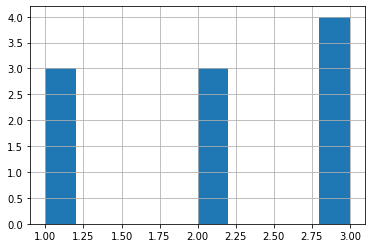

In [219]:
dane.hist()